In [1]:
import pyvisa as visa
import numpy as np
import time
import matplotlib.pyplot as plt
#import instrumental
import pandas as pd
import logging 
import pyvisa as visa

In [2]:
rm = visa.ResourceManager()
print(rm.list_resources())

('ASRL1::INSTR', 'ASRL2::INSTR', 'ASRL3::INSTR', 'ASRL10::INSTR', 'GPIB0::22::INSTR', 'GPIB0::23::INSTR')


In [3]:
#inicializo los instrumentos 

amperimetro = rm.open_resource('GPIB0::22::INSTR') #uno es el agilent --->corriente ok, no mide la corriente mide diferencia de voltaje, y tengo que usar la ley de ohm para calcular la corriente de la descarga 
volt = rm.open_resource("GPIB0::23::INSTR") #uno es el HP ----> tensión 
pirani = rm.open_resource("ASRL3::INSTR", read_termination='\r') #POR QUEEEE NO ANDAAAAAAAAAAAAAAAAAA :( ( :) )

#float(volt.query('MEASURE:VOLTAGE:DC?')) #V

In [28]:
print(amperimetro.query("MEASURE:VOLTAGE:DC?"))
print(volt.query("MEASURE:VOLTAGE:DC?"))
print((pirani.query("?GA1")))

-1.26260000E-05

+1.07634700E-01

6.76E-02


In [48]:
volt.write('CONF:VOLT:DC 1,0.000001') #El de abajo
volt.write('SENS:ZERO:AUTO OFF')
amperimetro.write('CONF:VOLT:DC 100,0.0001') #el de arriba ADR 22
amperimetro.write('SENS:ZERO:AUTO OFF')


20

MEDICION SIN PLOT


In [ ]:
nro_medicion = 16
T = [] #de aca sascamos para el V de la descarga en Volts
V_c = [] #de aca sale para la corriente en Volts
P = []
R2 = 55340
R1 = 67109000 #ohm
R3 = 14800
periodo = 50 #s
cant_mediciones = 150
tiempo_entre_medicion = 0.3 #seg/medicion
V_gen = 1.900 #V
mediciones_para_un_periodo_y_medio = periodo//tiempo_entre_medicion #Usamos // para obtener un numero entero de la división
t_0 = time.time()

#LOOP DE TOMA DE DATOS
for i in range(cant_mediciones):
    print(f'Medicion numero: {i}')
    t_voltimetro_i = time.time()    #Toma el tiempo para calcular cuánto tarda en medir
    T_i = float(volt.query("READ?")) 
    t_voltimetro_f = time.time()    #La medida al final del voltímetro es la misma que la inicial del amperimetro. Comparten variable
    V_ci = float(amperimetro.query("READ?"))
    t_amperimetro_f = time.time()   #Idem amperimetro
    P_i = float(pirani.query("?GA1"))
    t_pirani_f = time.time()

    P.append(P_i)
    T.append(T_i)
    V_c.append(V_ci)

    I=[]#esta es la del tubo
    for j in range(len(T)):
        I.append(float(V_c[j])/R3)
    I_1=[] 
    for j in range(len(T)):
        I_1.append(float(T[j])/R2)
    V=[]
    for j in range(len(V_c)):
        V.append(float(T[j])-float(V_c[j])+float(I_1[j])*R1)

    t_f = time.time()
    print(f'La medición del voltímetro tardó {t_voltimetro_f-t_voltimetro_i} segundos')
    print(f'La medición del amperímetro tardó {t_amperimetro_f - t_voltimetro_f} segundos')
    print(f'La medición del sensor pirani tardó {t_pirani_f - t_amperimetro_f} segundos')
    print(f'La medición tomo un total de {float(t_0)-float(t_f)} segundos')
    # time.sleep(tiempo_entre_medicion)

#GUARDADO DE DATOS
df = pd.DataFrame()
df["T"] = T #Tension en R2
df['V'] = V #Tension en celda
df["V_c"] = V_c  #Tension en R3
df['I'] = I #Corriente en celda
df["P"] = P
df['V_gen'] = pd.Series(V_gen, index = [0])
df['Mediciones p/s'] = pd.Series(tiempo_entre_medicion,index = [0])
df['Fecha'] = pd.Series([time.ctime()],index = [0])
df['Periodo'] = pd.Series(periodo, index = [0])
df.to_csv(f"C:/Users/publico/Desktop/G6L5V/Clase 18-10/Medición nro {nro_medicion}.csv", encoding = "utf-8")
   
    


Medicion numero: 0
i = 0
T = 0.23235923
V_c = 3.1e-05
0.5902969837188721 segundos
Medicion numero: 1
i = 1
T = 0.25307293
V_c = 5.2e-05
0.6393964290618896 segundos
Medicion numero: 2
i = 2
T = 0.27580944
V_c = 5.2e-05
0.6362121105194092 segundos
Medicion numero: 3
i = 3
T = 0.29980048
V_c = 4.2e-05
0.6447429656982422 segundos
Medicion numero: 4
i = 4
T = 0.32247891
V_c = 1e-05
0.6404438018798828 segundos
Medicion numero: 5
i = 5
T = 0.34535006
V_c = -2.1e-05
0.6372928619384766 segundos
Medicion numero: 6
i = 6
T = 0.36796378
V_c = 2.1e-05
0.6430394649505615 segundos
Medicion numero: 7
i = 7
T = 0.39161264
V_c = 2.1e-05
0.6400189399719238 segundos
Medicion numero: 8
i = 8
T = 0.41418448
V_c = 7.3e-05
0.640369176864624 segundos
Medicion numero: 9
i = 9
T = 0.43726874
V_c = 8.3e-05
0.639589786529541 segundos
Medicion numero: 10
i = 10
T = 0.4601402
V_c = 0.000135
0.6344118118286133 segundos
Medicion numero: 11
i = 11
T = 0.4828529
V_c = 9.4e-05
0.6441354751586914 segundos
Medicion numero:

MEDICION CON GRAFICO EN VIVO

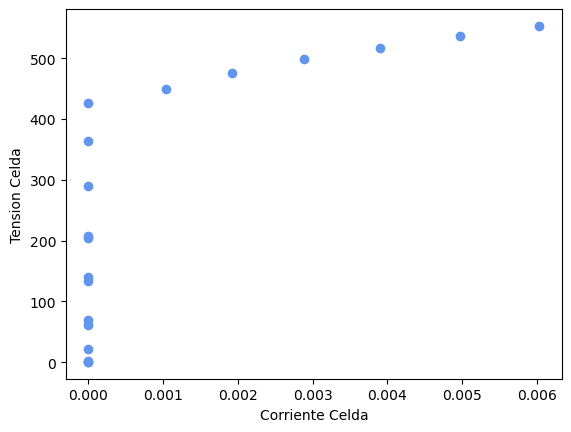

Medicion numero: 19


KeyboardInterrupt: 

In [50]:
from IPython import display
%matplotlib inline

nro_medicion = 15
T = [] #de aca sascamos para el V de la descarga en Volts
V_c = [] #de aca sale para la corriente en Volts
P = []
R2 = 55340
R1 = 67109000 #ohm
R3 = 14800
periodo = 10 #s
cant_mediciones = 150
tiempo_entre_medicion = 0.3 #seg/medicion
mediciones_para_un_periodo_y_medio = int(periodo//tiempo_entre_medicion)
V_gen = 1.600 #V

yticks = np.arange(0,11,10)*100

# for i in range(mediciones_para_un_periodo_y_medio), Donde 1 y 2 son la inicial y final para el promedio:
for i in range(cant_mediciones):
    print(f'Medicion numero: {i}')
    T_1 = float(volt.query("READ?"))
    V_1 = float(amperimetro.query("READ?"))
    T_2 = float(volt.query("READ?"))
    V_2 = float(amperimetro.query("READ?"))
    T_i = (T_1 + T_2)/2
    V_ci = (V_1 + V_2)/2
    P_i = float(pirani.query("?GA1"))
    P.append(P_i)
    T.append(T_i)
    V_c.append(V_ci)
    #pi.write("!US3")
    #print(pi.query("?GA1"))
    # print("i =", i)
    # print("T =", T_i)
    # print("V_c =", V_ci)
    I=[]#esta es la del tubo
    for j in range(len(T)):
        I.append(float(V_c[j])/R3)
    I_1=[] 
    for j in range(len(T)):
        I_1.append(float(T[j])/R2)
    #I_1=I*R2

    V=[]
    for j in range(len(V_c)):
        V.append(float(T[j])-float(V_c[j])+float(I_1[j])*R1)

    #plt.scatter(I,V)
    plt.xlabel("Corriente Celda")
    plt.ylabel("Tension Celda")
    # plt.yticks(ticks = yticks, labels = yticks)
    plt.scatter(I,V,color = 'cornflowerblue')
    display.display(plt.gcf())
    display.clear_output(wait=True)
    plt.pause(0.1)
   
    time.sleep(tiempo_entre_medicion)

df = pd.DataFrame()
df["T"] = T #Tension en R2
df['V'] = V #Tension en celda
df["V_c"] = V_c  #Tension en R3
df['I'] = I #Corriente en celda
df["P"] = P
df['V_gen'] = pd.Series(V_gen, index = [0])
df['Mediciones p/s'] = pd.Series(tiempo_entre_medicion,index = [0])
df['Fecha'] = pd.Series([time.ctime()],index = [0])
df['Periodo'] = pd.Series(periodo, index = [0])
df['Distancia'] = pd.Series('15.6',index = [0])
df.to_csv(f"C:/Users/publico/Desktop/G6L5V/Clase 18-10/Medición nro {nro_medicion}.csv", encoding = "utf-8")

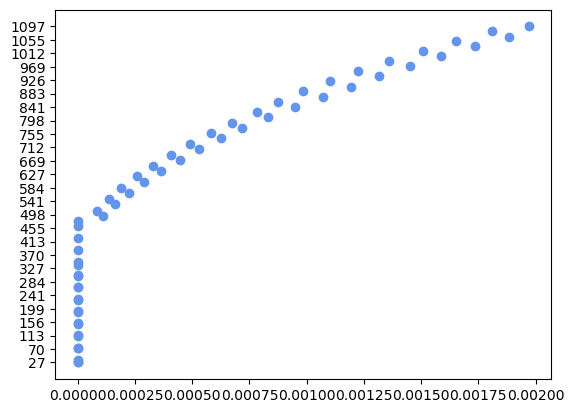

In [45]:
nro_medicion = 500
filename = rf'Clase 18-10\Medición nro {nro_medicion}.csv'
df = pd.read_csv(filename)
I = df['I'] #Corriente en celda
V = df['V'] #Tension en celda

fig,ax = plt.subplots()

ax.scatter(I,V,color = 'cornflowerblue')
ylabels = np.linspace(min(V),max(V),26,endpoint = True)
#ax.set_xlim(0.0015,0.0025)
# ylabels = np.linspace(0,1200,26,endpoint = True)
ax.set_yticks(ylabels)
ax.set_yticklabels([f'{number:.0f}' for number in ylabels]);




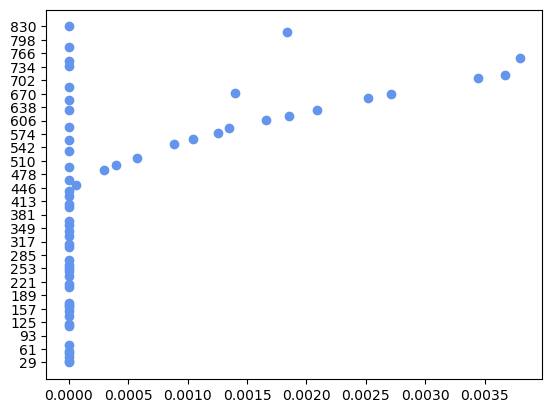

In [18]:
nro_medicion = 2
filename = rf'Clase 18-10\Medición nro {nro_medicion}.csv'
df = pd.read_csv(filename)
I = df['I'] #Corriente en celda
V = df['V'] #Tension en celda

fig,ax = plt.subplots()

ax.scatter(I,V,color = 'cornflowerblue')
ylabels = np.linspace(min(V),max(V),26,endpoint = True)
# ylabels = np.linspace(0,1200,26,endpoint = True)
ax.set_yticks(ylabels)
ax.set_yticklabels([f'{number:.0f}' for number in ylabels]);

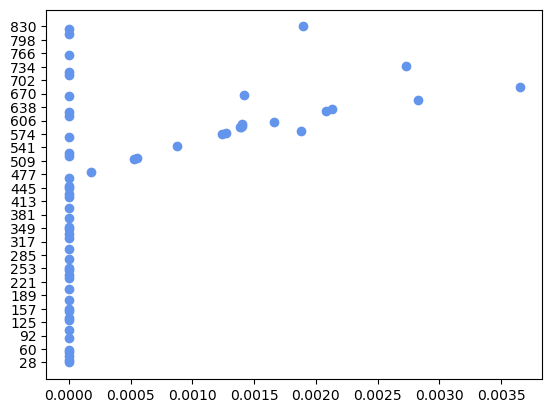

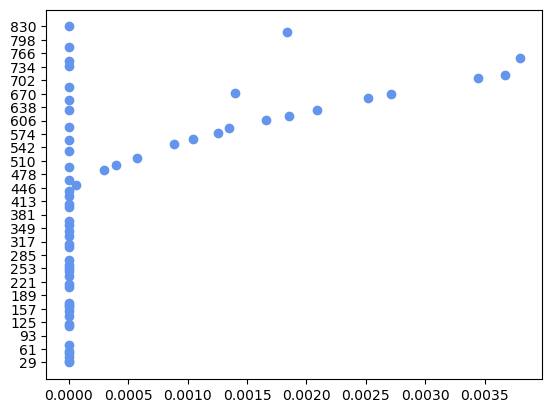

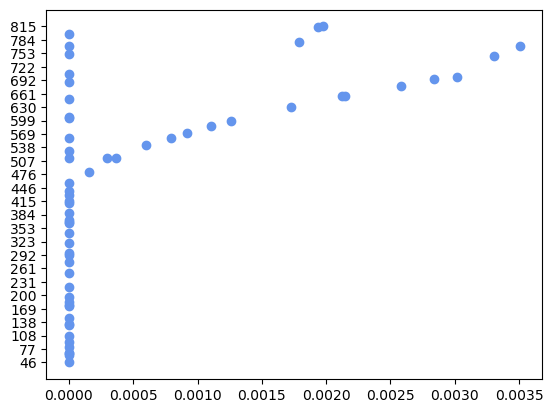

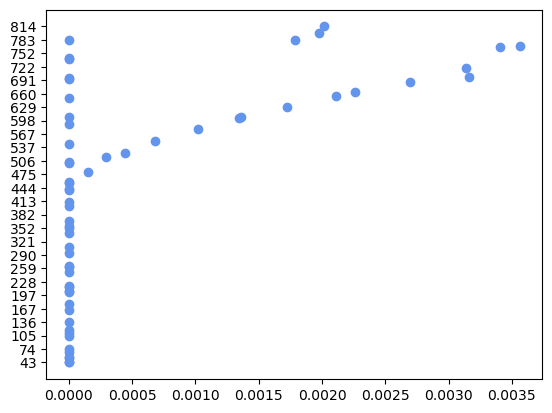

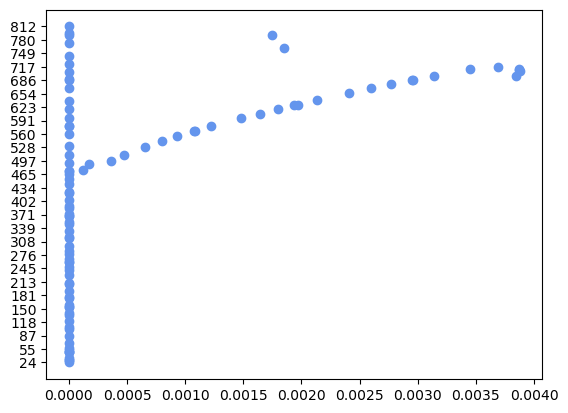

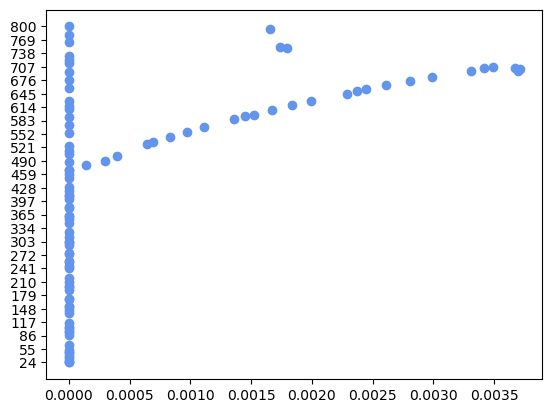

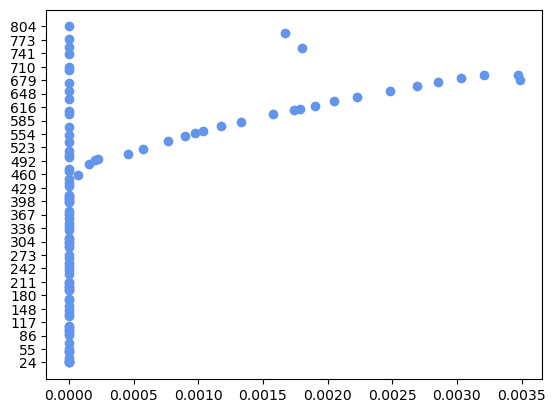

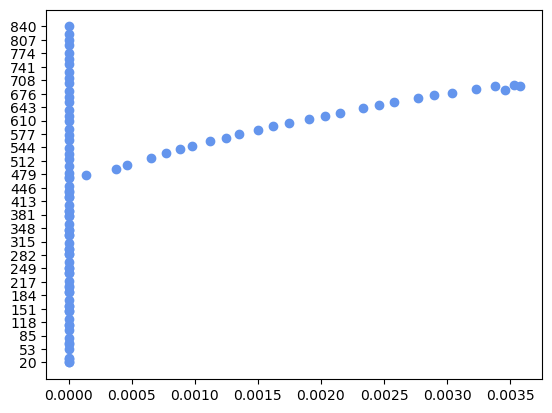

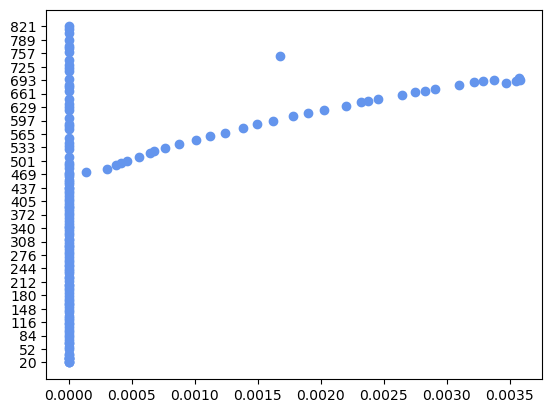

In [17]:
for nro_medicion in [1,2,3,4,6,7,8,10,11]:
    filename = rf'Clase 18-10\Medición nro {nro_medicion}.csv'
    df = pd.read_csv(filename)
    I = df['I'] #Corriente en celda
    V = df['V'] #Tension en celda

    fig,ax = plt.subplots()

    ax.scatter(I,V,color = 'cornflowerblue')
    ylabels = np.linspace(min(V),max(V),26,endpoint = True)
    #ax.set_xlim(0.0015,0.0025)
    # ylabels = np.linspace(0,1200,26,endpoint = True)
    ax.set_yticks(ylabels)
    ax.set_yticklabels([f'{number:.0f}' for number in ylabels]);


<class 'float'>
[1000.0, 1000.0, 1000.0, 1000.0, 1000.0, 482.0, 78.8, 25.7, 11.7, 5.96, 3.31, 2.07, 1.3, 0.911, 0.648, 0.503, 0.401, 0.343, 0.288, 0.262, 0.239, 0.223, 0.212, 0.202, 0.194, 0.187, 0.181, 0.177, 0.173, 0.17, 0.166, 0.164, 0.162, 0.16, 0.158, 0.156, 0.154, 0.152, 0.151, 0.15, 0.149, 0.147, 0.145, 0.144, 0.143, 0.142, 0.14, 0.139, 0.139, 0.137]


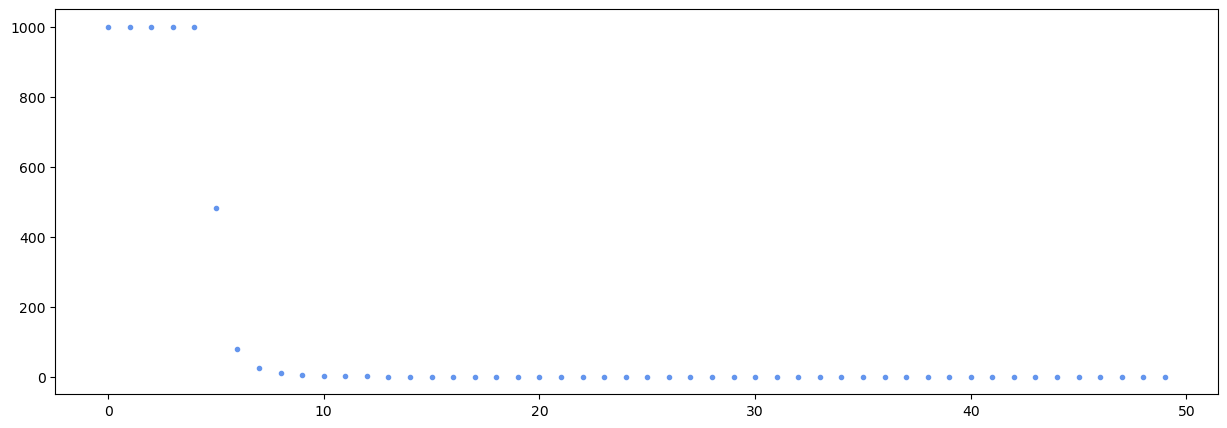

In [71]:
print(type(presion[0]))
print(presion)
fig,ax = plt.subplots(figsize = (15,5))
ax.scatter(np.arange(len(presion)),presion, color = 'cornflowerblue',marker = '.')